# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/thyroidDF.csv')

In [ ]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [ ]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG,patient_id
count,9172.000000,8330.000000,6568.000000,8730.000000,8363.000000,8370.000000,349.000000,9.172000e+03
mean,73.555822,5.218403,1.970629,108.700305,0.976056,113.640746,29.870057,8.529473e+08
std,1183.976718,24.184006,0.887579,37.522670,0.200360,41.551650,21.080504,7.581969e+06
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000,8.408010e+08
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,21.000000,8.504090e+08
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000,8.510040e+08
75%,68.000000,2.700000,2.300000,126.000000,1.065000,128.000000,31.000000,8.607110e+08
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000,8.701190e+08


# Data Preprocessing

Categorical variables

In [ ]:
categorical_variables = []
for i in df.columns:
  if df[i].dtypes == 'O':
    categorical_variables.append(i)

In [ ]:
categorical_variables

['sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_meds',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH_measured',
 'T3_measured',
 'TT4_measured',
 'T4U_measured',
 'FTI_measured',
 'TBG_measured',
 'referral_source',
 'target']

Removing unwanted columns

In [ ]:
df.drop(columns = ['patient_id','referral_source'], inplace = True)

In [ ]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,target
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,f,NaN,-
1,29,F,f,f,f,f,f,f,f,f,...,1.9,t,128.0,f,NaN,f,NaN,f,NaN,-
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,11.0,-
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,26.0,-
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,36.0,S


In [ ]:
numerical_variables = []
for cols in df.columns:
  if df[cols].dtypes != 'O':
    numerical_variables.append(cols)

numerical_variables

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

In [ ]:
# descrete variables
descrete_variables = []
for cols in numerical_variables:
  if len(df[cols].unique()) <= 100:
    descrete_variables.append(cols)

descrete_variables

['age', 'T3', 'TBG']

In [ ]:
#continous variables
continous_variables = []
for cols in numerical_variables:
  if cols not in descrete_variables:
    continous_variables.append(cols)

continous_variables

['TSH', 'TT4', 'T4U', 'FTI']

Checking for the outliers using boxplot

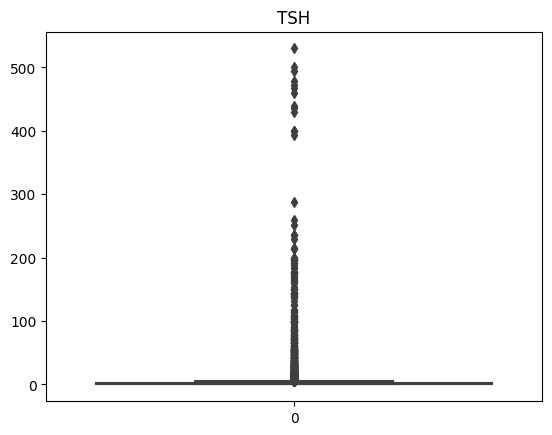

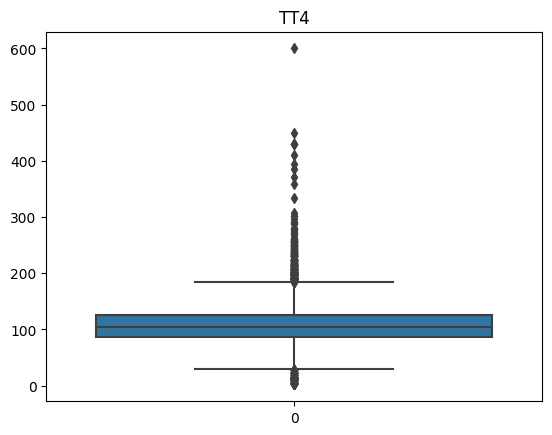

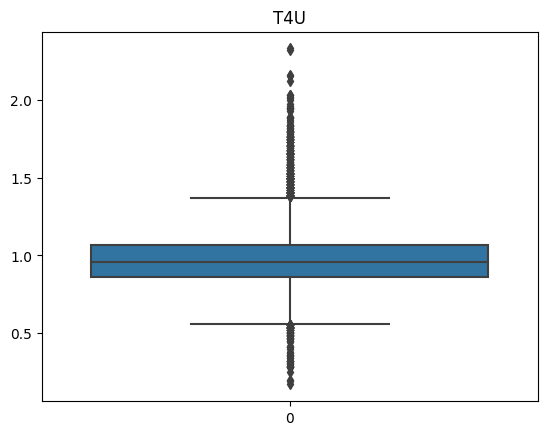

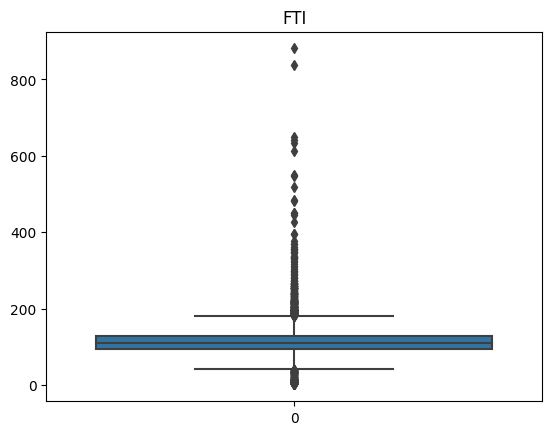

In [ ]:
for cols in continous_variables:
  sns.boxplot(df[cols])
  plt.title(cols)
  plt.show()

Missing values

In [ ]:
df.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
target                    0
dtype: int64

In [ ]:
columns_with_missing = []
for cols in df.columns:
  if df[cols].isnull().sum() > 1:
    columns_with_missing.append(cols)

In [ ]:
columns_with_missing

['sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

In [ ]:
df[columns_with_missing].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     8865 non-null   object 
 1   TSH     8330 non-null   float64
 2   T3      6568 non-null   float64
 3   TT4     8730 non-null   float64
 4   T4U     8363 non-null   float64
 5   FTI     8370 non-null   float64
 6   TBG     349 non-null    float64
dtypes: float64(6), object(1)
memory usage: 501.7+ KB


In [ ]:
sex_mapping = {'M':1, 'F':0}
df['sex'] = df['sex'].map(sex_mapping)

In [ ]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,target
0,29,0.0,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,f,NaN,-
1,29,0.0,f,f,f,f,f,f,f,f,...,1.9,t,128.0,f,NaN,f,NaN,f,NaN,-
2,41,0.0,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,11.0,-
3,36,0.0,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,26.0,-
4,32,0.0,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,36.0,S


In [ ]:
#filling the 'sex' column with the most frequent data
most_frequent_sex = df['sex'].mode().values[0]
df['sex'].fillna(most_frequent_sex, inplace = True)

In [ ]:
df['sex'].isnull().sum()

0

Filling the remaining missing values with KNNImputer as they are floating values.

In [ ]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

In [ ]:
columns_with_missing = []
for cols in df.columns:
  if df[cols].isnull().sum() > 1:
    columns_with_missing.append(cols)
columns_with_missing

['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

In [ ]:
for cols in columns_with_missing:
  df[cols] = knn_imputer.fit_transform(df[[cols]])

Checking the distribution of the numerical continous data.

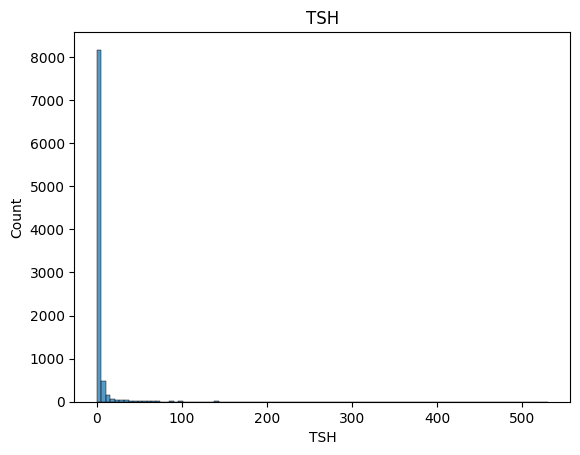

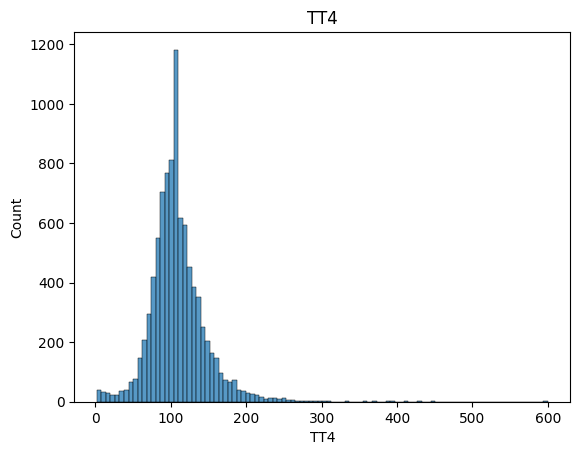

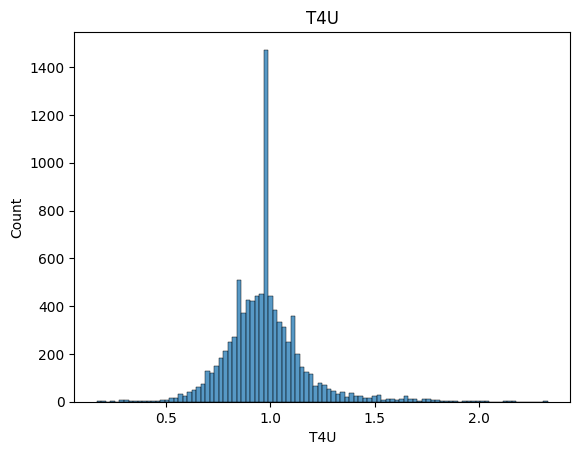

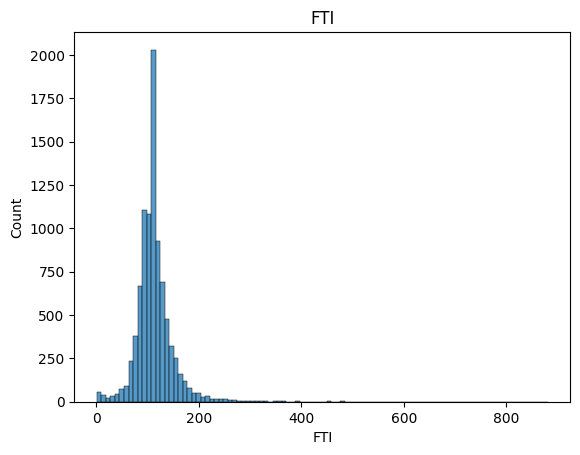

In [ ]:
for cols in continous_variables:
  sns.histplot(df[cols], bins = 100)
  plt.title(cols)
  plt.show()

# Feature Engineering

In [ ]:
for cols in continous_variables:
  print('mean of:',cols, np.mean(df[cols]))
  print('median of:',cols, np.median(df[cols]))

mean of: TSH 5.218402753781514
median of: TSH 1.6
mean of: TT4 108.70030469644904
median of: TT4 106.0
mean of: T4U 0.9760557216309936
median of: T4U 0.9760557216309935
mean of: FTI 113.64074551935482
median of: FTI 112.0


According to the statistics TSH is positively skewed.

In [ ]:
# log transformation of TSH column
df['TSH'] = np.log(df['TSH'])

<Axes: xlabel='TSH', ylabel='Count'>

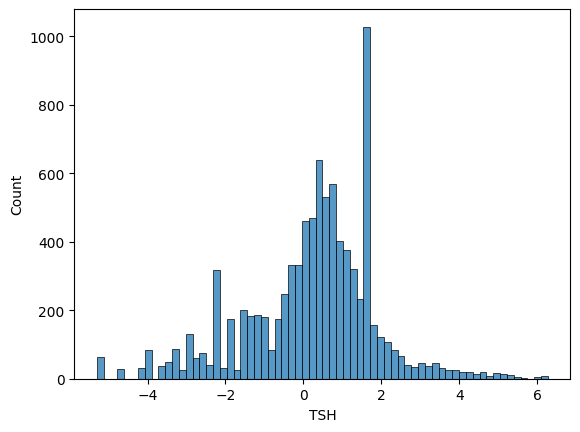

In [ ]:
sns.histplot(df['TSH'])

In [ ]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,target
0,29,0.0,f,f,f,f,f,f,f,t,...,1.970629,f,108.700305,f,0.976056,f,113.640746,f,29.870057,-
1,29,0.0,f,f,f,f,f,f,f,f,...,1.900000,t,128.000000,f,0.976056,f,113.640746,f,29.870057,-
2,41,0.0,f,f,f,f,f,f,f,f,...,1.970629,f,108.700305,f,0.976056,f,113.640746,t,11.000000,-
3,36,0.0,f,f,f,f,f,f,f,f,...,1.970629,f,108.700305,f,0.976056,f,113.640746,t,26.000000,-
4,32,0.0,f,f,f,f,f,f,f,f,...,1.970629,f,108.700305,f,0.976056,f,113.640746,t,36.000000,S


In [ ]:
columns_with_two_cat = []
for cols in df.columns:
  if len(df[cols].unique()) == 2:
    columns_with_two_cat.append(cols)

columns_with_two_cat

['sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_meds',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH_measured',
 'T3_measured',
 'TT4_measured',
 'T4U_measured',
 'FTI_measured',
 'TBG_measured']

Feature encoding

In [ ]:
# Encoding the columns with true and false
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for cols in columns_with_two_cat:
  df[cols] = encoder.fit_transform(df[cols])

df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,target
0,29,0,0,0,0,0,0,0,0,1,...,1.970629,0,108.700305,0,0.976056,0,113.640746,0,29.870057,-
1,29,0,0,0,0,0,0,0,0,0,...,1.900000,1,128.000000,0,0.976056,0,113.640746,0,29.870057,-
2,41,0,0,0,0,0,0,0,0,0,...,1.970629,0,108.700305,0,0.976056,0,113.640746,1,11.000000,-
3,36,0,0,0,0,0,0,0,0,0,...,1.970629,0,108.700305,0,0.976056,0,113.640746,1,26.000000,-
4,32,0,0,0,0,0,0,0,0,0,...,1.970629,0,108.700305,0,0.976056,0,113.640746,1,36.000000,S


<ipython-input-84-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

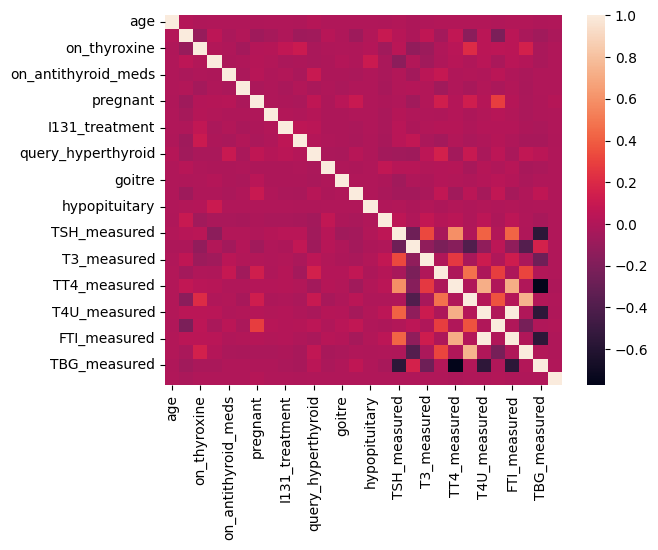

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df['target'].unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

In [ ]:
target_map = {
    '-':1, 'S':2, 'F':3, 'AK':4, 'R':5, 'I':6, 'M':7, 'N':8, 'G':9, 'K':10, 'A':11, 'KJ':12, 'L':13,
       'MK':14, 'Q':15, 'J':16, 'C|I':17, 'O':18, 'LJ':19, 'H|K':20, 'D':21, 'GK':22, 'MI':23, 'P':24,
       'FK':25, 'B':26, 'GI':27, 'C':28, 'GKJ':29, 'OI':30, 'D|R':31, 'E':32
}

In [ ]:
df['target'] = df['target'].map(target_map)

In [ ]:
df['target'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

# Cross validation

In [ ]:
x = df.drop(columns = 'target')
y = df['target']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(classifier,x,y,cv=5,scoring = 'accuracy')
print('mean accuracy:',np.mean(cv_score))
print('standard deviation:',np.std(cv_score))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


mean accuracy: 0.9422141267431116
standard deviation: 0.00957456118370252


In [ ]:
cv_score_gb = cross_val_score(gb_classifier,x,y,cv=5,scoring = 'accuracy')
print('mean accuracy gradient boosting:',np.mean(cv_score_gb))
print('standard deviation gradient boosting:',np.std(cv_score_gb))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


mean accuracy gradient boosting: 0.7641362219534735
standard deviation gradient boosting: 0.33310668544038563


# Model Training

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
classifier.fit(x_train,y_train)

RandomForestClassifier()

# Model evaluation

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print('accuracy:',accuracy_score(y_test,y_pred))
print('classification report:',classification_report(y_test,y_pred))


accuracy: 0.9487738419618529
classification report:               precision    recall  f1-score   support

           1       0.97      0.97      0.97      1353
           2       1.00      1.00      1.00        19
           3       0.90      1.00      0.95        53
           4       1.00      1.00      1.00        12
           5       0.89      0.79      0.84        39
           6       0.91      0.77      0.83        65
           7       0.96      0.92      0.94        25
           8       0.96      0.88      0.92        26
           9       0.95      1.00      0.97        54
          10       0.82      0.99      0.90        99
          11       0.79      0.86      0.83        22
          12       1.00      1.00      1.00         2
          13       0.76      0.62      0.68        21
          14       0.75      1.00      0.86         3
          15       1.00      0.20      0.33         5
          16       1.00      0.60      0.75         5
          17       0.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Calculating mathrews correlation coefficeint

# Feature importance

In [ ]:
feature_importances = classifier.feature_importances_

In [ ]:
feature_importance_df = pd.DataFrame({'Features':x_train.columns,'Importance':feature_importances})
feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = False)
feature_importance_df.head(7)

,Features,Importance
17,TSH,0.232659
19,T3,0.195620
25,FTI,0.156654
21,TT4,0.132977
23,T4U,0.089533
2,on_thyroxine,0.044807
0,age,0.042571
